## Getting Started
In this project, we will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')
sns.set_context('notebook')

In [2]:
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data=pd.read_csv('housing.csv',names=names,delim_whitespace=True)


In [3]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [6]:
data['RM'].max()

8.7799999999999994

In [47]:
data.shape

(506, 14)

In [48]:
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [49]:
pd.set_option('precision',1)
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.6e+00,8.6,6.3e-03,8.2e-02,0.3,3.7,89.0
ZN,506.0,1.1e+01,23.3,0.0e+00,0.0e+00,0.0,12.5,100.0
INDUS,506.0,1.1e+01,6.9,4.6e-01,5.2e+00,9.7,18.1,27.7
CHAS,506.0,6.9e-02,0.3,0.0e+00,0.0e+00,0.0,0.0,1.0
NOX,506.0,5.5e-01,0.1,3.9e-01,4.5e-01,0.5,0.6,0.9
RM,506.0,6.3e+00,0.7,3.6e+00,5.9e+00,6.2,6.6,8.8
AGE,506.0,6.9e+01,28.1,2.9e+00,4.5e+01,77.5,94.1,100.0
DIS,506.0,3.8e+00,2.1,1.1e+00,2.1e+00,3.2,5.2,12.1
RAD,506.0,9.5e+00,8.7,1.0e+00,4.0e+00,5.0,24.0,24.0
TAX,506.0,4.1e+02,168.5,1.9e+02,2.8e+02,330.0,666.0,711.0


In [50]:
pd.set_option('precision',2)
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-5.59e-02,0.42,-0.22,0.35,-0.38,6.26e-01,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-4.27e-02,-0.52,0.31,-0.57,0.66,-3.12e-01,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,6.29e-02,0.76,-0.39,0.64,-0.71,5.95e-01,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00e+00,0.09,0.09,0.09,-0.10,-7.37e-03,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,9.12e-02,1.00,-0.30,0.73,-0.77,6.11e-01,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,9.13e-02,-0.30,1.00,-0.24,0.21,-2.10e-01,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,8.65e-02,0.73,-0.24,1.00,-0.75,4.56e-01,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-9.92e-02,-0.77,0.21,-0.75,1.00,-4.95e-01,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-7.37e-03,0.61,-0.21,0.46,-0.49,1.00e+00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-3.56e-02,0.67,-0.29,0.51,-0.53,9.10e-01,1.00,0.46,-0.44,0.54,-0.47


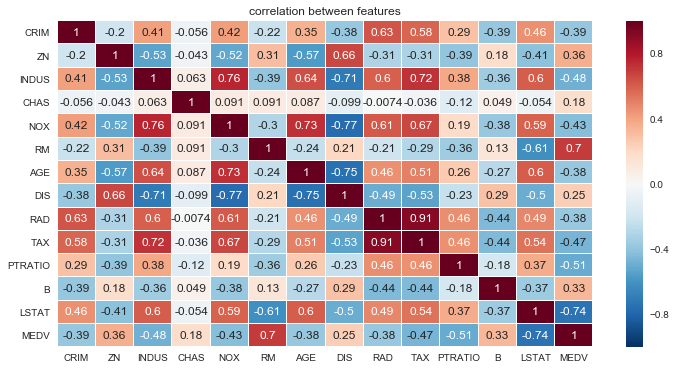

In [51]:
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(),annot=True,lw=0.01)
plt.title('correlation between features')

From Correlation data, We can confim that variable LSTAT, RM, AGE and PTRATIO have good corelation with our output variable MEDV. These variables we need to consider when we optimze our predictive value

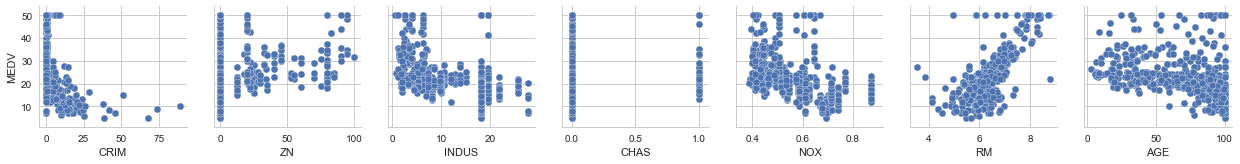

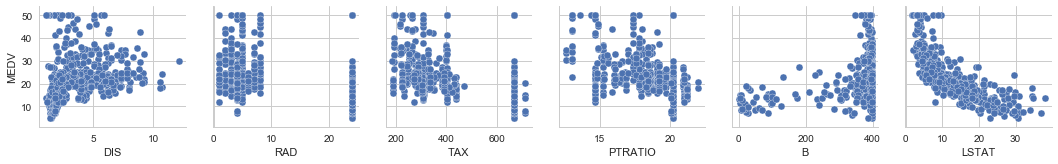

In [52]:
sns.pairplot(data,x_vars=['CRIM', 'ZN', 'INDUS','CHAS', 'NOX', 'RM', 'AGE'],
            y_vars='MEDV',size=2.5,aspect=1)
sns.pairplot(data,x_vars=['DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'],y_vars='MEDV',size=2.5,aspect=1)

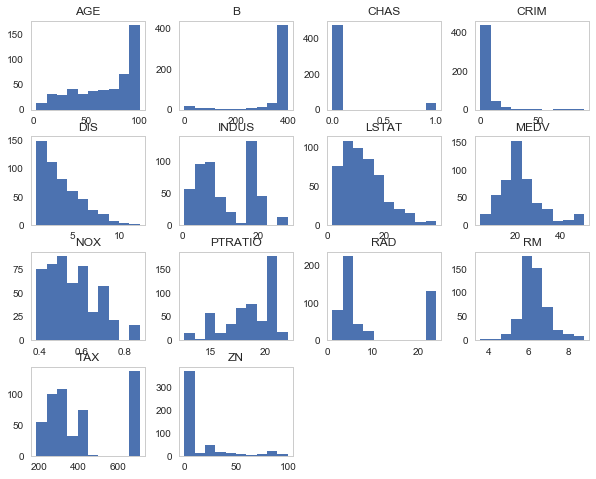

In [53]:
data.hist(bins=10,figsize=(10,8),grid=False);

We can see that some variables have an exponential distribution, such as CRIM, ZN, AGE and B. We can see that others have a bimodal distribution such as RAD and TAX.

Features 'RM', 'LSTAT', 'PTRATIO', and 'MEDV' are essential, the remaining non-relevant features have been excluded. Analysis from above data: 1)increase in RM value increases MEDV value ie price of the home. 2) Lower the value of LSTAT higher the value of MEDV 3) PTRATIO decrease in the value increases MEDV

In [54]:
prices=data['MEDV']
data=data.drop(['CRIM','ZN','AGE','INDUS','NOX','DIS','RAD'],axis=1)

In [55]:
features=data.drop(['MEDV'],axis=1)

In [56]:
data.head()

,CHAS,RM,TAX,PTRATIO,B,LSTAT,MEDV
0,0,6.58,296.0,15.3,396.90,4.98,24.0
1,0,6.42,242.0,17.8,396.90,9.14,21.6
2,0,7.18,242.0,17.8,392.83,4.03,34.7
3,0,7.00,222.0,18.7,394.63,2.94,33.4
4,0,7.15,222.0,18.7,396.90,5.33,36.2


In [57]:
features.head()

,CHAS,RM,TAX,PTRATIO,B,LSTAT
0,0,6.58,296.0,15.3,396.90,4.98
1,0,6.42,242.0,17.8,396.90,9.14
2,0,7.18,242.0,17.8,392.83,4.03
3,0,7.00,222.0,18.7,394.63,2.94
4,0,7.15,222.0,18.7,396.90,5.33


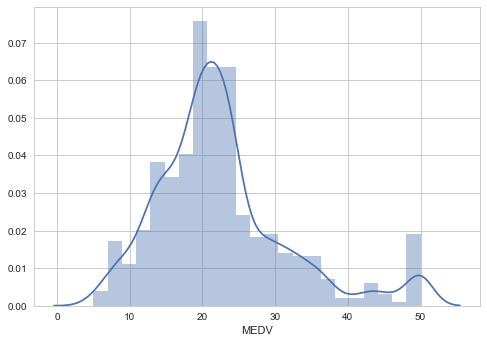

In [58]:
sns.distplot(prices)

MEDV is Deviated from the normal distribution, have positive skewness and showed peakedness.

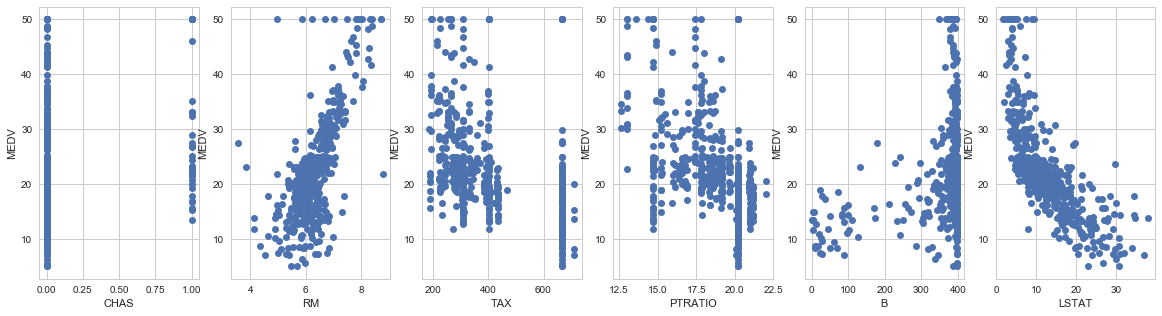

In [59]:
plt.figure(figsize=(20,5))
for i,col in enumerate(features):
    plt.subplot(1,6,i+1)
    x=data[col]
    y=prices
    plt.plot(x,y,'o')
    plt.xlabel(col)
    plt.ylabel('MEDV')


Price increases with RM and Price decreases with increase in PTRATO and LSTAT

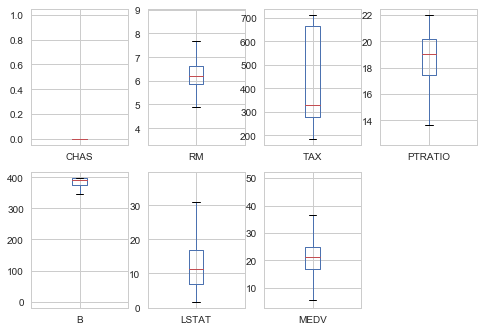

In [60]:
data.plot(kind='box',subplots=True,layout=(2,4));

In [61]:
data.isnull().sum()

CHAS       0
RM         0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

The point here is to test 'MEDV' (Price) in a very lean way. We'll do this paying attention to: Histogram - Kurtosis and skewness. Normal probability plot - Data distribution should closely follow the diagonal that represents the normal distribution.

### 1) Data Standardization

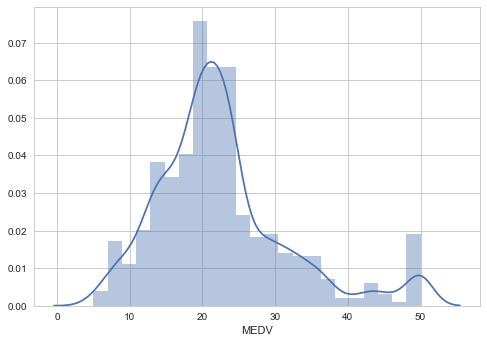

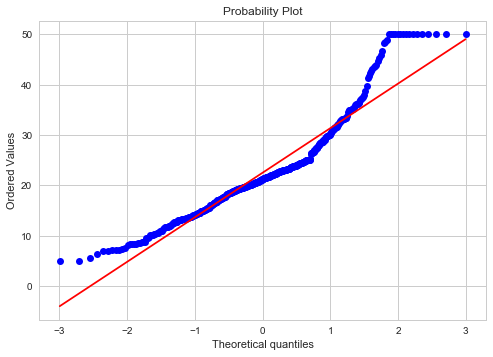

In [62]:
from scipy import stats 
sns.distplot(data['MEDV'])
fig=plt.figure()
res=stats.probplot(data['MEDV'],plot=plt)

It shows 'peakedness', positive skewness and does not follow the diagonal line. A simple data transformation can solve the problem. Will do in by standardizing the data

In [63]:
array=np.array(data)
X=array[:,0:6]
y=array[:,6]
validation_size=0.2
seed=7

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=validation_size,random_state=seed)

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [65]:
models=[]
models.append(('LR',LinearRegression()))
models.append(('LASSO',Lasso()))
models.append(('EN',ElasticNet()))
models.append(('KNN',KNeighborsRegressor()))
models.append(('CART',DecisionTreeRegressor()))
models.append(('SVR',SVR()))


In [66]:
models

[('LR',
  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)),
 ('LASSO', Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
     normalize=False, positive=False, precompute=False, random_state=None,
     selection='cyclic', tol=0.0001, warm_start=False)),
 ('EN', ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
        max_iter=1000, normalize=False, positive=False, precompute=False,
        random_state=None, selection='cyclic', tol=0.0001, warm_start=False)),
 ('KNN',
  KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
            metric_params=None, n_jobs=1, n_neighbors=5, p=2,
            weights='uniform')),
 ('CART',
  DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             presort=False

### evaluate each model in turn

In [67]:
num_folds=10
seed=7,
RMS='neg_mean_squared_error'

In [68]:
results=[]
names=[]

for name, model in models:
    kfold=KFold(n_splits=num_folds,random_state=seed)
    cv_results=cross_val_score(model,X_train,y_train,cv=kfold,scoring=RMS)
    results.append(cv_results)
    names.append(name)
    msg='%s :%f (%f)'%(name,cv_results.mean(),cv_results.std())
    print(msg)
    

LR :-23.768361 (8.605772)
LASSO :-27.493923 (10.882721)
EN :-29.810753 (11.625759)
KNN :-31.329157 (9.939710)
CART :-28.579896 (12.313418)
SVR :-80.981430 (31.368760)


### Compare algorithms

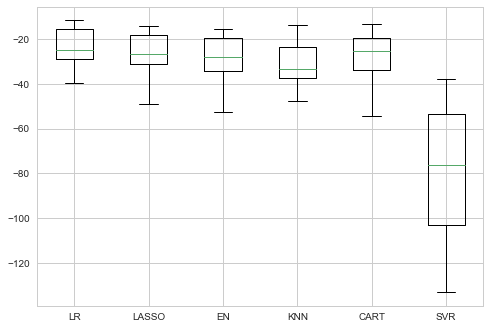

In [69]:
fig=plt.figure()
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names);

### Standardize the data

In [70]:
from sklearn.preprocessing import StandardScaler

In [71]:
sc=StandardScaler()

In [72]:
scaled_X_train=sc.fit_transform(X_train)

In [73]:
results=[]
names=[]

for name, model in models:
    kfold=KFold(n_splits=num_folds,random_state=seed)
    cv_results=cross_val_score(model,scaled_X_train,y_train,cv=kfold,scoring=RMS)
    results.append(cv_results)
    names.append(name)
    msg='%s :%f (%f)'%(name,cv_results.mean(),cv_results.std())
    print(msg)
    

LR :-23.768361 (8.605772)
LASSO :-26.625987 (9.048040)
EN :-28.014355 (10.190246)
KNN :-16.432728 (8.918804)
CART :-28.423121 (14.635810)
SVR :-26.463271 (15.928768)


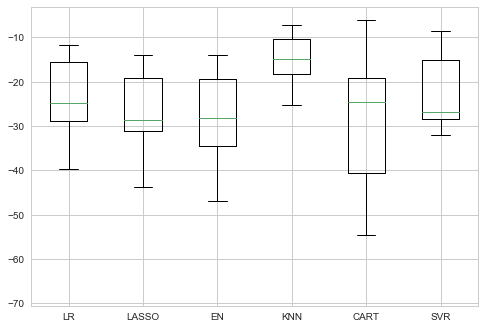

In [74]:
fig=plt.figure()
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names);

## KNN algorithm tuning

In [75]:
from sklearn.model_selection import GridSearchCV 

In [76]:
k_values=list(np.arange(1,25,2))
param_grid={'n_neighbors':k_values}
model=KNeighborsRegressor()
kfold=KFold(n_splits=10,random_state=seed)
grid=GridSearchCV(estimator=model,param_grid=param_grid,scoring=RMS,cv=kfold)
grid_result=grid.fit(scaled_X_train,y_train)

print('Best score :%f using %s'%(grid_result.best_score_,grid_result.best_params_))
means=grid_result.cv_results_['mean_test_score']
stds=grid_result.cv_results_['std_test_score']
params=grid_result.cv_results_['params']

for param,mean,std in zip(params,means,stds):
    print('mean : %f std :%f with :%s '%(mean,std,param))
    


Best score :-16.000790 using {'n_neighbors': 7}
mean : -24.133094 std :10.559892 with :{'n_neighbors': 1} 
mean : -16.202057 std :8.184862 with :{'n_neighbors': 3} 
mean : -16.472066 std :8.967071 with :{'n_neighbors': 5} 
mean : -16.000790 std :9.611708 with :{'n_neighbors': 7} 
mean : -16.751550 std :10.501406 with :{'n_neighbors': 9} 
mean : -17.854392 std :11.162656 with :{'n_neighbors': 11} 
mean : -18.529700 std :11.592646 with :{'n_neighbors': 13} 
mean : -18.516609 std :10.518194 with :{'n_neighbors': 15} 
mean : -19.254440 std :10.270674 with :{'n_neighbors': 17} 
mean : -20.002164 std :10.009585 with :{'n_neighbors': 19} 
mean : -20.138334 std :9.663304 with :{'n_neighbors': 21} 
mean : -20.657085 std :9.652812 with :{'n_neighbors': 23} 


In [77]:
#grid_result.cv_results_

### Ensembles

In [78]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from xgboost.sklearn import XGBRegressor


In [79]:
ensembles=[]
ensembles.append(('Scaled KNN',Pipeline([('Scaler',StandardScaler()),('KNN',KNeighborsRegressor())])))
ensembles.append(('Scaled AB',Pipeline([('Scaler',StandardScaler()),('AB',AdaBoostRegressor())])))
ensembles.append(('Scaled GBM',Pipeline([('Scaler',StandardScaler()),('GBM',GradientBoostingRegressor())])))
ensembles.append(('Scaled RF',Pipeline([('Scaler',StandardScaler()),('RF',RandomForestRegressor())])))
ensembles.append(('Scaled ET',Pipeline([('Scaler',StandardScaler()),('ET',ExtraTreesRegressor())])))

In [80]:
results=[]
names=[]

for name,model in ensembles:
    kfold=KFold(n_splits=num_folds,random_state=seed)
    cv_results=cross_val_score(model,X_train,y_train,cv=kfold,scoring=RMS)
    results.append(cv_results)
    names.append(name)
    msg=print('Estimator: %s,%f,%f'%(name,cv_results.mean(),cv_results.std()))

Estimator: Scaled KNN,-16.364071,9.046376
Estimator: Scaled AB,-17.215280,5.850072
Estimator: Scaled GBM,-11.974078,6.362765
Estimator: Scaled RF,-16.670172,8.937222
Estimator: Scaled ET,-13.831463,6.507142


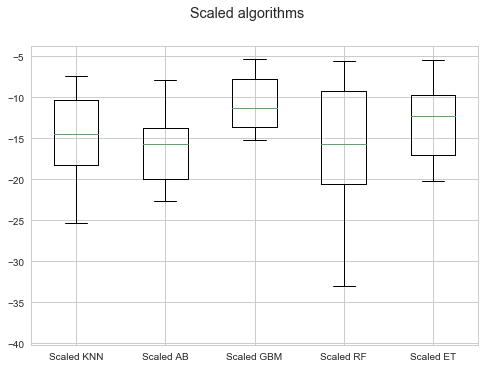

In [81]:
fig=plt.figure()
fig.suptitle('Scaled algorithms')
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names);
plt.show()

### Tune scaled GBM

In [82]:
param_test1={'n_estimators':list(range(120,230,10))}

In [83]:
grid1=GridSearchCV(estimator=GradientBoostingRegressor(learning_rate=0.1,subsample=0.8,min_samples_split=10,
                                                      min_samples_leaf=2,max_depth=3,max_features='sqrt',random_state=10),
                 param_grid=param_test1,scoring=RMS,n_jobs=4,iid=False,cv=10)

grid1.fit(scaled_X_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=2, min_samples_split=10,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=10, subsample=0.8, verbose=0,
             warm_start=False),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'n_estimators': [120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [84]:
grid1.grid_scores_,grid1.best_params_,grid1.best_score_

C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: -12.78684, std: 6.48831, params: {'n_estimators': 120},
  mean: -12.68972, std: 6.54381, params: {'n_estimators': 130},
  mean: -12.65009, std: 6.33117, params: {'n_estimators': 140},
  mean: -12.57476, std: 6.25992, params: {'n_estimators': 150},
  mean: -12.64343, std: 6.33759, params: {'n_estimators': 160},
  mean: -12.63362, std: 6.43129, params: {'n_estimators': 170},
  mean: -12.61993, std: 6.39641, params: {'n_estimators': 180},
  mean: -12.59220, std: 6.41490, params: {'n_estimators': 190},
  mean: -12.59577, std: 6.46014, params: {'n_estimators': 200},
  mean: -12.59110, std: 6.44159, params: {'n_estimators': 210},
  mean: -12.57824, std: 6.40822, params: {'n_estimators': 220}],
 {'n_estimators': 150},
 -12.574761125096668)

In [85]:
param_test2={'max_depth':list(range(2,10,2)),'min_samples_split':list(range(5,50,5))}

grid2=GridSearchCV(estimator=GradientBoostingRegressor(learning_rate=0.1,n_estimators=150,subsample=0.8,random_state=10,
                                                         max_features='sqrt',min_samples_leaf=2),param_grid=param_test2,scoring=RMS,n_jobs=4,iid=False,cv=10)

grid2.fit(scaled_X_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=2, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=150,
             presort='auto', random_state=10, subsample=0.8, verbose=0,
             warm_start=False),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'max_depth': [2, 4, 6, 8], 'min_samples_split': [5, 10, 15, 20, 25, 30, 35, 40, 45]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [87]:
grid2.grid_scores_,grid2.best_params_,grid2.best_score_

C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: -13.89118, std: 7.07522, params: {'max_depth': 2, 'min_samples_split': 5},
  mean: -14.12610, std: 7.04289, params: {'max_depth': 2, 'min_samples_split': 10},
  mean: -14.10279, std: 7.30593, params: {'max_depth': 2, 'min_samples_split': 15},
  mean: -13.82668, std: 6.99075, params: {'max_depth': 2, 'min_samples_split': 20},
  mean: -14.03493, std: 7.08404, params: {'max_depth': 2, 'min_samples_split': 25},
  mean: -14.03743, std: 7.15479, params: {'max_depth': 2, 'min_samples_split': 30},
  mean: -14.20152, std: 7.27667, params: {'max_depth': 2, 'min_samples_split': 35},
  mean: -14.46412, std: 7.32547, params: {'max_depth': 2, 'min_samples_split': 40},
  mean: -14.22192, std: 7.07953, params: {'max_depth': 2, 'min_samples_split': 45},
  mean: -12.05313, std: 7.14348, params: {'max_depth': 4, 'min_samples_split': 5},
  mean: -11.72086, std: 6.47090, params: {'max_depth': 4, 'min_samples_split': 10},
  mean: -11.80154, std: 6.62284, params: {'max_depth': 4, 'min_samples_split':

In [88]:
param_test3={'min_samples_leaf':list(range(2,10,2))}

In [89]:
grid3=GridSearchCV(estimator=GradientBoostingRegressor(learning_rate=0.1,n_estimators=150,subsample=0.8,random_state=10,max_features='sqrt',
                                                      max_depth=4,min_samples_split=25),param_grid=param_test3,scoring=RMS,n_jobs=4,iid=False,cv=10)


grid3.fit(scaled_X_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=4,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=25,
             min_weight_fraction_leaf=0.0, n_estimators=150,
             presort='auto', random_state=10, subsample=0.8, verbose=0,
             warm_start=False),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'min_samples_leaf': [2, 4, 6, 8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [90]:
grid3.grid_scores_,grid3.best_params_,grid3.best_score_

C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: -13.04360, std: 6.85017, params: {'min_samples_leaf': 2},
  mean: -13.04321, std: 6.39648, params: {'min_samples_leaf': 4},
  mean: -12.62339, std: 6.10883, params: {'min_samples_leaf': 6},
  mean: -12.32665, std: 5.37346, params: {'min_samples_leaf': 8}],
 {'min_samples_leaf': 8},
 -12.326653465395321)

In [91]:
param_test4={'max_features':list(range(1,6,1))}

grid4=GridSearchCV(estimator=GradientBoostingRegressor(n_estimators=150,learning_rate=0.1,subsample=0.8,random_state=10,
                                                      max_depth=4,min_samples_split=25,min_samples_leaf=8),param_grid=param_test4,
                   scoring=RMS,n_jobs=4,iid=False,cv=10)

grid4.fit(scaled_X_train,y_train)
                   

GridSearchCV(cv=10, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=8,
             min_samples_split=25, min_weight_fraction_leaf=0.0,
             n_estimators=150, presort='auto', random_state=10,
             subsample=0.8, verbose=0, warm_start=False),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'max_features': [1, 2, 3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [92]:
grid4.grid_scores_,grid4.best_params_,grid4.best_score_

C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: -12.72019, std: 5.72946, params: {'max_features': 1},
  mean: -12.32665, std: 5.37346, params: {'max_features': 2},
  mean: -11.89326, std: 5.58228, params: {'max_features': 3},
  mean: -12.37942, std: 5.76799, params: {'max_features': 4},
  mean: -12.23519, std: 5.45471, params: {'max_features': 5}],
 {'max_features': 3},
 -11.893262823561042)

In [93]:
param_test5={'subsample':list(np.arange(0.1,1,0.1))}

grid5=GridSearchCV(estimator=GradientBoostingRegressor(n_estimators=150,learning_rate=0.1,random_state=10,max_depth=4,
                                                       min_samples_split=25,min_samples_leaf=8,max_features=2),
                              param_grid=param_test5,n_jobs=4,iid=False,cv=10)

grid5.fit(scaled_X_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=4, max_features=2,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=8,
             min_samples_split=25, min_weight_fraction_leaf=0.0,
             n_estimators=150, presort='auto', random_state=10,
             subsample=1.0, verbose=0, warm_start=False),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'subsample': [0.10000000000000001, 0.20000000000000001, 0.30000000000000004, 0.40000000000000002, 0.5, 0.59999999999999998, 0.70000000000000007, 0.80000000000000004, 0.90000000000000002]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [94]:
grid5.grid_scores_,grid5.best_params_,grid5.best_score_

C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.71916, std: 0.09694, params: {'subsample': 0.10000000000000001},
  mean: 0.79439, std: 0.07540, params: {'subsample': 0.20000000000000001},
  mean: 0.81712, std: 0.06874, params: {'subsample': 0.30000000000000004},
  mean: 0.82694, std: 0.07186, params: {'subsample': 0.40000000000000002},
  mean: 0.83419, std: 0.07100, params: {'subsample': 0.5},
  mean: 0.83883, std: 0.07210, params: {'subsample': 0.59999999999999998},
  mean: 0.84510, std: 0.05934, params: {'subsample': 0.70000000000000007},
  mean: 0.84451, std: 0.06078, params: {'subsample': 0.80000000000000004},
  mean: 0.83634, std: 0.07075, params: {'subsample': 0.90000000000000002}],
 {'subsample': 0.70000000000000007},
 0.84509896902871129)

With all tuned lets try reducing the learning rate and proportionally increasing the number of estimators to get more robust results:

In [95]:
gbm_tuned1=GradientBoostingRegressor(learning_rate=0.05,n_estimators=300,max_depth=4,random_state=10,min_samples_split=25,min_samples_leaf=8,
                                    max_features=2,subsample=0.7)

gbm_tuned1.fit(scaled_X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='ls', max_depth=4, max_features=2,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=8,
             min_samples_split=25, min_weight_fraction_leaf=0.0,
             n_estimators=300, presort='auto', random_state=10,
             subsample=0.7, verbose=0, warm_start=False)

In [96]:
sc=StandardScaler()
sc.fit(X_train)
scaled_X_test=sc.transform(X_test)

In [97]:
y_pred=gbm_tuned1.predict(scaled_X_test)

In [98]:
y_pred.astype('int')

array([20, 19, 20, 19, 10, 12, 20, 22, 25, 12, 12, 31, 16, 17, 38, 17, 24,
       29, 11, 21, 14, 26, 42, 17, 14, 12, 34, 25, 24, 25, 20, 27, 30, 12,
       43, 18, 20, 14, 20, 24, 22, 16, 14, 25, 17,  9, 22, 20, 17, 18, 24,
       24, 20, 48, 12, 23, 18, 19, 24, 19, 19, 31, 19, 21, 20, 48, 17, 20,
       20, 29, 23, 10, 19, 31, 20, 19, 12, 17, 29, 19, 21, 26, 21, 29, 24,
       27, 23, 20, 35, 21, 36, 41, 40, 22, 23, 12, 21, 12, 10, 27, 18, 17])

In [99]:
submission=pd.DataFrame({'original_house_price':y_test,
                        'Predicted_house_price':y_pred})

In [100]:
submission

,Predicted_house_price,original_house_price
0,20.33,21.7
1,19.01,18.5
2,20.59,22.2
3,19.43,20.4
4,10.45,8.8
5,12.67,8.3
6,20.23,21.4
7,22.94,23.6
8,25.74,23.5
9,12.48,19.0


In [103]:
from sklearn import metrics
print('MAE',metrics.mean_absolute_error(y_test,y_pred))
print('MSE', metrics.mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE 2.63197163582
MSE 19.8750445931
RMSE 4.45814362634
